In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

# Scikit learn ibraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# **1) Data Audit & Validation**

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/employee_attrition_dataset.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Showing the first 5 rows of dataset
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [ ]:
# Dropping the Employee_ID column
df = df.drop('Employee_ID', axis=1)

In [ ]:
# Checking the shape of data
df.shape

(1000, 25)

In [ ]:
# Checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

In [ ]:
# Statistical summary of data
df.describe()

,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [ ]:
# Unique value in the categorical column
categorical = df.select_dtypes(include='object')
for col in categorical.columns:
    print(f'Column: {col}')
    print(f'Unique values: {categorical[col].unique()}')
    print(f'Number of unique values: {categorical[col].nunique()}\n')

Column: Gender
Unique values: ['Female' 'Male']
Number of unique values: 2

Column: Marital_Status
Unique values: ['Married' 'Divorced' 'Single']
Number of unique values: 3

Column: Department
Unique values: ['IT' 'Sales' 'Marketing' 'Finance' 'HR']
Number of unique values: 5

Column: Job_Role
Unique values: ['Manager' 'Assistant' 'Executive' 'Analyst']
Number of unique values: 4

Column: Overtime
Unique values: ['No' 'Yes']
Number of unique values: 2

Column: Attrition
Unique values: ['No' 'Yes']
Number of unique values: 2



In [ ]:
# min and max value of numeric column

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    print(f'Column: {col}')
    print(f'  Min value: {df[col].min()}')
    print(f'  Max value: {df[col].max()}')
    print('')

Column: Age
  Min value: 20
  Max value: 59

Column: Job_Level
  Min value: 1
  Max value: 5

Column: Monthly_Income
  Min value: 3001
  Max value: 19999

Column: Hourly_Rate
  Min value: 15
  Max value: 99

Column: Years_at_Company
  Min value: 1
  Max value: 29

Column: Years_in_Current_Role
  Min value: 1
  Max value: 14

Column: Years_Since_Last_Promotion
  Min value: 0
  Max value: 9

Column: Work_Life_Balance
  Min value: 1
  Max value: 4

Column: Job_Satisfaction
  Min value: 1
  Max value: 5

Column: Performance_Rating
  Min value: 1
  Max value: 4

Column: Training_Hours_Last_Year
  Min value: 0
  Max value: 99

Column: Project_Count
  Min value: 1
  Max value: 9

Column: Average_Hours_Worked_Per_Week
  Min value: 30
  Max value: 59

Column: Absenteeism
  Min value: 0
  Max value: 19

Column: Work_Environment_Satisfaction
  Min value: 1
  Max value: 4

Column: Relationship_with_Manager
  Min value: 1
  Max value: 4

Column: Job_Involvement
  Min value: 1
  Max value: 4

Column

In [ ]:
#checking for null values
df.isnull().sum()[df.isnull().sum()>0]

,0


In [ ]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

**Outlier Detection**

In [ ]:
# checking for outliers using IQR method
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if not outliers.empty:
        print(f"Column: {col}")
        print(f"  Outliers: {outliers.tolist()}")
        print(f"  Number of Outliers: {len(outliers)}")
        print('')
    else:
        print(f"Column: {col}: No outliers detected.")
        print('')

Column: Age: No outliers detected.

Column: Job_Level: No outliers detected.

Column: Monthly_Income: No outliers detected.

Column: Hourly_Rate: No outliers detected.

Column: Years_at_Company: No outliers detected.

Column: Years_in_Current_Role: No outliers detected.

Column: Years_Since_Last_Promotion: No outliers detected.

Column: Work_Life_Balance: No outliers detected.

Column: Job_Satisfaction: No outliers detected.

Column: Performance_Rating: No outliers detected.

Column: Training_Hours_Last_Year: No outliers detected.

Column: Project_Count: No outliers detected.

Column: Average_Hours_Worked_Per_Week: No outliers detected.

Column: Absenteeism: No outliers detected.

Column: Work_Environment_Satisfaction: No outliers detected.

Column: Relationship_with_Manager: No outliers detected.

Column: Job_Involvement: No outliers detected.

Column: Distance_From_Home: No outliers detected.

Column: Number_of_Companies_Worked: No outliers detected.



In [ ]:
# Mapping the Attrition: Yes:1 and No:0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Value count and percentage of attrition
print(df['Attrition'].value_counts())
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition
0    811
1    189
Name: count, dtype: int64
Attrition
0    81.1
1    18.9
Name: proportion, dtype: float64


# **2) Feature Engineering**

In [ ]:
# Promotion Stagnation:
# This feature calculates the ratio of Years_Since_Last_Promotion to Years_at_Company + 1. A higher ratio indicates slower career growth within the company.

df['Promotion_Stagnation'] = df['Years_Since_Last_Promotion'] / (df['Years_at_Company'] + 1)
display(df[['Years_Since_Last_Promotion', 'Years_at_Company', 'Promotion_Stagnation']].head())

,Years_Since_Last_Promotion,Years_at_Company,Promotion_Stagnation
0,2,15,0.125000
1,1,6,0.142857
2,8,24,0.320000
3,2,10,0.181818
4,1,29,0.033333


In [ ]:
# Workload Index:
# This feature attempts to capture a 'stress proxy' by considering the hours worked, project count, and work-life balance.

df['Workload_Index'] = ((df['Average_Hours_Worked_Per_Week'] * df['Project_Count']) / (df['Work_Life_Balance'] + 1e-6)).round(0)
display(df[['Average_Hours_Worked_Per_Week', 'Project_Count', 'Work_Life_Balance', 'Workload_Index']].head())

,Average_Hours_Worked_Per_Week,Project_Count,Work_Life_Balance,Workload_Index
0,54,6,1,324.0
1,45,2,2,45.0
2,34,6,3,68.0
3,48,9,3,144.0
4,33,3,2,49.0


In [ ]:
# Engagement Score:
# This feature provides an overall job engagement score by taking the mean of several satisfaction and involvement metrics.

df['Engagement_Score'] = df[['Job_Involvement', 'Job_Satisfaction', 'Work_Environment_Satisfaction', 'Relationship_with_Manager']].mean(axis=1)
display(df[['Job_Involvement', 'Job_Satisfaction', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Engagement_Score']].head())

,Job_Involvement,Job_Satisfaction,Work_Environment_Satisfaction,Relationship_with_Manager,Engagement_Score
0,4,3,4,4,3.75
1,2,1,4,1,2.00
2,4,2,3,4,3.25
3,1,5,2,3,2.75
4,3,5,4,1,3.25


In [ ]:
# Growth Index:
# This feature indicates the pace of career progression by relating the job level to the years spent at the company.

df['Growth_Index'] = (df['Job_Level'] / (df['Years_at_Company'] + 1)).round(3)
display(df[['Job_Level', 'Years_at_Company', 'Growth_Index']].head())

,Job_Level,Years_at_Company,Growth_Index
0,1,15,0.062
1,5,6,0.714
2,1,24,0.040
3,1,10,0.091
4,1,29,0.033


In [ ]:
# Experience to Income Ratio:
# This feature evaluates the rewards versus loyalty by dividing monthly income by years at the company.

df['Experience_to_Income_Ratio'] = (df['Monthly_Income'] / (df['Years_at_Company'] + 1)).round(2)
display(df[['Monthly_Income', 'Years_at_Company', 'Experience_to_Income_Ratio']].head())

,Monthly_Income,Years_at_Company,Experience_to_Income_Ratio
0,15488,15,968.00
1,13079,6,1868.43
2,13744,24,549.76
3,6809,10,619.00
4,10206,29,340.20


In [ ]:
# Training Effectiveness:
# This feature aims to measure the benefit derived from training by multiplying performance rating with training hours.

df['Training_Effectiveness'] = df['Performance_Rating'] * df['Training_Hours_Last_Year']
display(df[['Performance_Rating', 'Training_Hours_Last_Year', 'Training_Effectiveness']].head())

,Performance_Rating,Training_Hours_Last_Year,Training_Effectiveness
0,4,14,56
1,1,6,6
2,1,77,77
3,4,49,196
4,1,64,64


In [ ]:
# Overtime Flag:
# This is a binary indicator for whether an employee works overtime, converting 'Yes' to 1 and 'No' to 0.

df['Overtime_Flag'] = df['Overtime'].apply(lambda x: 1 if x == 'Yes' else 0)
display(df[['Overtime', 'Overtime_Flag']].head())

,Overtime,Overtime_Flag
0,No,0
1,Yes,1
2,Yes,1
3,No,0
4,No,0


In [ ]:
# Since we have Overtime_Flag, now dropping the Overtime
df = df.drop('Overtime', axis=1)

In [ ]:
# Distance Bucket:
# This feature categorizes the Distance_From_Home into different ranges to represent commute pressure.

df['Distance_Bucket'] = pd.qcut(df['Distance_From_Home'], q=4, labels=['Close', 'Medium', 'Far', 'Very Far'])
display(df[['Distance_From_Home', 'Distance_Bucket']].head())

,Distance_From_Home,Distance_Bucket
0,20,Medium
1,25,Far
2,45,Very Far
3,35,Far
4,44,Very Far


In [ ]:
# Since we have Distance_Bucket, now dropping the Distance_From_Home
df = df.drop('Distance_From_Home', axis=1)

In [ ]:
# Absenteeism Level:
# This feature bins the Absenteeism count into descriptive levels to serve as a discipline indicator.
# Logic: Bin Absenteeism into 'Low', 'Medium', 'High' levels.

df['Absenteeism_Level'] = pd.qcut(df['Absenteeism'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
display(df[['Absenteeism', 'Absenteeism_Level']].head())

,Absenteeism,Absenteeism_Level
0,17,High
1,1,Low
2,2,Low
3,18,High
4,0,Low


In [ ]:
# Since we have Absenteeism_Level, now dropping the Absenteeism
df = df.drop('Absenteeism', axis=1)

In [ ]:
# Age Group:
# This feature categorizes employees into different age groups, reflecting career stages.
# Logic: Bin Age into groups (e.g., '<30', '30-40', '40-50', '>50').

bins = [0, 30, 40, 50, df['Age'].max()]
labels = ['<30', '30-40', '40-50', '>50']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
display(df[['Age', 'Age_Group']].head())

,Age,Age_Group
0,58,>50
1,48,40-50
2,34,30-40
3,27,<30
4,40,40-50


In [ ]:
# Since we have Age_Group, now dropping the Age
df = df.drop('Age', axis=1)

In [ ]:
  # Job Stagnation:
  # This feature calculates the ratio of years in the current role to years at the company, indicating potential role stagnation.

  df['Job_Stagnation'] = (df['Years_in_Current_Role'] / (df['Years_at_Company'] + 1)).round(2)
  display(df[['Years_in_Current_Role', 'Years_at_Company', 'Job_Stagnation']].head())

,Years_in_Current_Role,Years_at_Company,Job_Stagnation
0,4,15,0.25
1,9,6,1.29
2,14,24,0.56
3,8,10,0.73
4,10,29,0.33


In [ ]:
# Work Efficiency:
# This feature estimates the average time spent per project, indicating work efficiency.

df['Work_Efficiency'] = (df['Average_Hours_Worked_Per_Week'] / df['Project_Count'].replace(0, np.nan)).round(2)
display(df[['Average_Hours_Worked_Per_Week', 'Project_Count', 'Work_Efficiency']].head())

,Average_Hours_Worked_Per_Week,Project_Count,Work_Efficiency
0,54,6,9.00
1,45,2,22.50
2,34,6,5.67
3,48,9,5.33
4,33,3,11.00


In [ ]:
# Tenure Bucket:
# This feature categorizes employees based on their years at the company, which can correlate with attrition tendencies.

bins = [0, 3, 7, df['Years_at_Company'].max() + 1] # +1 to include the max value
labels = ['Early', 'Mid', 'Long']
df['Tenure_Bucket'] = pd.cut(df['Years_at_Company'], bins=bins, labels=labels, right=False)
display(df[['Years_at_Company', 'Tenure_Bucket']].head())

,Years_at_Company,Tenure_Bucket
0,15,Long
1,6,Mid
2,24,Long
3,10,Long
4,29,Long


In [ ]:
# Income Level:
# This feature segments employees by their monthly income into quartiles to understand lifestyle segments.

df['Income_Level'] = pd.qcut(df['Monthly_Income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
display(df[['Monthly_Income', 'Income_Level']].head())

,Monthly_Income,Income_Level
0,15488,Q3
1,13079,Q3
2,13744,Q3
3,6809,Q1
4,10206,Q2


In [ ]:
# Performance to Involvement:
# This feature aims to balance performance rating with job involvement, potentially indicating motivation versus reward.

df['Performance_to_Involvement'] = (df['Performance_Rating'] / (df['Job_Involvement'] + 1e-6)).round(2)
display(df[['Performance_Rating', 'Job_Involvement', 'Performance_to_Involvement']].head())

,Performance_Rating,Job_Involvement,Performance_to_Involvement
0,4,4,1.00
1,1,2,0.50
2,1,4,0.25
3,4,1,4.00
4,1,3,0.33


In [ ]:
# Checking the dataframe
df.head()

,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Number_of_Companies_Worked,Attrition,Promotion_Stagnation,Workload_Index,Engagement_Score,Growth_Index,Experience_to_Income_Ratio,Training_Effectiveness,Overtime_Flag,Distance_Bucket,Absenteeism_Level,Age_Group,Job_Stagnation,Work_Efficiency,Tenure_Bucket,Income_Level,Performance_to_Involvement
0,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,6,54,4,4,4,3,0,0.125000,324.0,3.75,0.062,968.00,56,0,Medium,High,>50,0.25,9.00,Long,Q3,1.00
1,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,2,45,4,1,2,2,0,0.142857,45.0,2.00,0.714,1868.43,6,1,Far,Low,40-50,1.29,22.50,Mid,Q3,0.50
2,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,6,34,3,4,4,3,0,0.320000,68.0,3.25,0.040,549.76,77,1,Very Far,Low,30-40,0.56,5.67,Long,Q3,0.25
3,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,9,48,2,3,1,3,0,0.181818,144.0,2.75,0.091,619.00,196,0,Far,High,<30,0.73,5.33,Long,Q1,4.00
4,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,3,33,4,1,3,3,0,0.033333,49.0,3.25,0.033,340.20,64,0,Very Far,Low,40-50,0.33,11.00,Long,Q2,0.33


# **3) EDA**

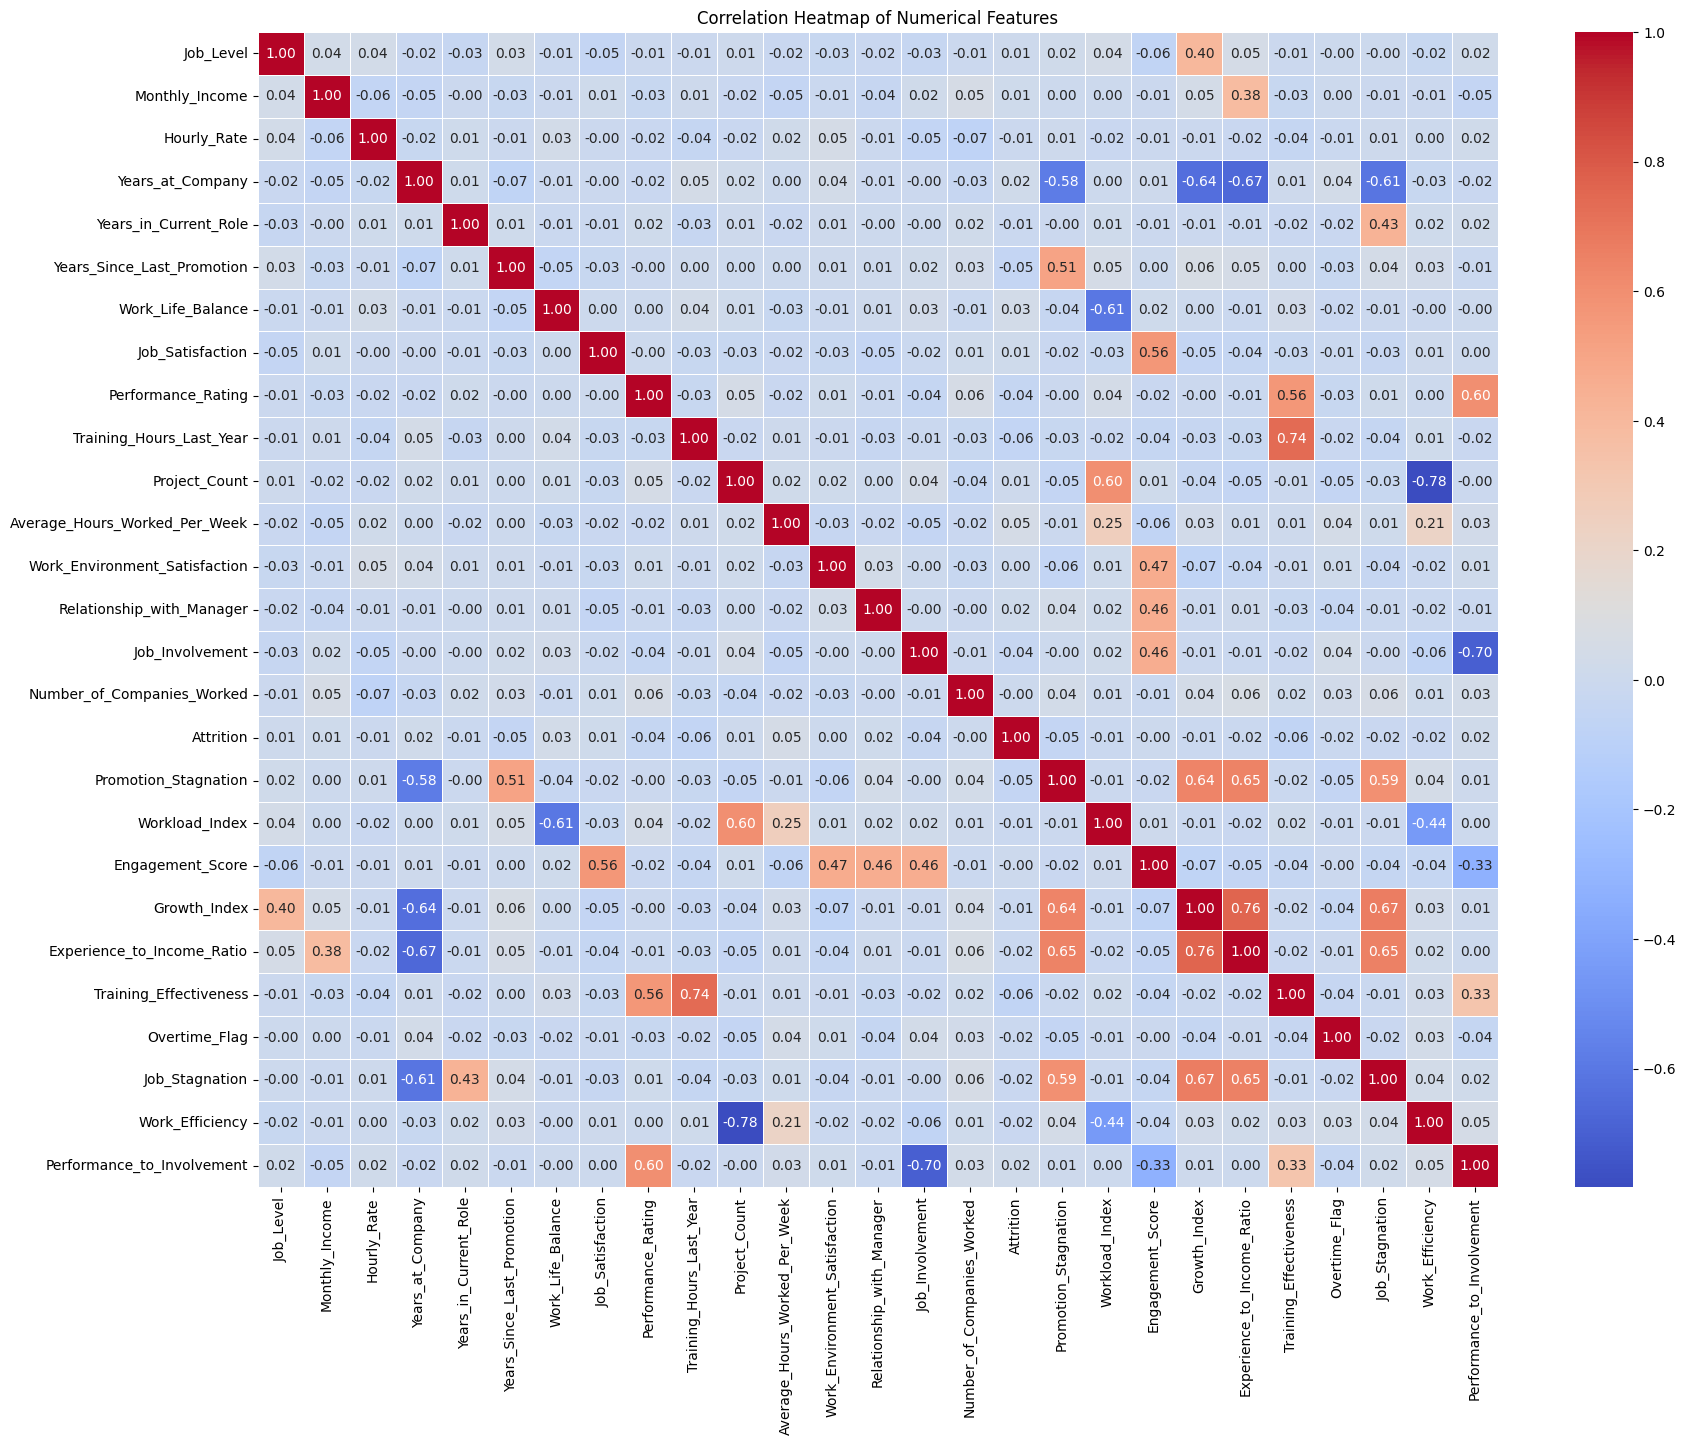

In [ ]:
# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
r_threshold = 0.6

highly_correlated_pairs = []
# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)): # Avoid duplicate pairs and self-correlation
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]

        if abs(correlation_value) >= r_threshold:
            highly_correlated_pairs.append((col1, col2, correlation_value))

if highly_correlated_pairs:
    print(f"Columns with absolute correlation >= {r_threshold}:")
    for col1, col2, corr_val in highly_correlated_pairs:
        print(f"  - '{col1}' and '{col2}': {corr_val:.2f}")
else:
    print(f"No columns found with an absolute correlation >= {r_threshold}.")

Columns with absolute correlation >= 0.6:
  - 'Years_at_Company' and 'Growth_Index': -0.64
  - 'Years_at_Company' and 'Experience_to_Income_Ratio': -0.67
  - 'Years_at_Company' and 'Job_Stagnation': -0.61
  - 'Work_Life_Balance' and 'Workload_Index': -0.61
  - 'Training_Hours_Last_Year' and 'Training_Effectiveness': 0.74
  - 'Project_Count' and 'Work_Efficiency': -0.78
  - 'Job_Involvement' and 'Performance_to_Involvement': -0.70
  - 'Promotion_Stagnation' and 'Growth_Index': 0.64
  - 'Promotion_Stagnation' and 'Experience_to_Income_Ratio': 0.65
  - 'Growth_Index' and 'Experience_to_Income_Ratio': 0.76
  - 'Growth_Index' and 'Job_Stagnation': 0.67
  - 'Experience_to_Income_Ratio' and 'Job_Stagnation': 0.65


In [ ]:
# Droping the column with high corr

drop_cols = [
    'Training_Hours_Last_Year',
    'Project_Count',
    'Performance_to_Involvement',
    'Experience_to_Income_Ratio',
    'Job_Stagnation',
    'Promotion_Stagnation',
    'Work_Life_Balance'
]

df = df.drop(columns=drop_cols)

In [ ]:
df.shape

(1000, 29)

# **4) Model Training**

In [ ]:
# Data Preparation
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
# Encode categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Encode target
y = LabelEncoder().fit_transform(y)  # No→0, Yes→1

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
# Balance training set
sm = ADASYN(random_state=42, sampling_strategy=0.6)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Define Models to Compare
# -------------------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=8, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
    "XGBoost": XGBClassifier(
        objective='binary:logistic',
        max_depth=5,
        learning_rate=0.05,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        base_score=0.5,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        loss_function='Logloss',
        eval_metric='AUC',
        verbose=0,
        random_state=42
    )
}

# -------------------------------------------------------------------------
# 3️⃣  Evaluate Each Model
# -------------------------------------------------------------------------
results = []

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"🚀 Training {name}...")
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Classification Report
    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, digits=3))

    # ROC-AUC
    if roc_auc is not None:
        print(f"ROC-AUC Score: {roc_auc:.3f}")
    else:
        print("ROC-AUC Score: N/A (no probability estimates available)")

    # Store results
    results.append({
        "Model": name,
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-Score": round(f1, 3),
        "ROC-AUC": round(roc_auc, 3) if roc_auc is not None else "N/A"
    })

# -------------------------------------------------------------------------
# 4️⃣  Display Summary Table
# -------------------------------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
print("\n" + "="*60)
print("\n🏁 Model Comparison Summary:\n")
print(results_df.to_string(index=False))



🚀 Training Logistic Regression...

📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0      0.815     0.599     0.690       162
           1      0.198     0.421     0.269        38

    accuracy                          0.565       200
   macro avg      0.506     0.510     0.480       200
weighted avg      0.698     0.565     0.610       200

ROC-AUC Score: 0.510

🚀 Training Decision Tree...

📊 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0      0.842     0.494     0.623       162
           1      0.219     0.605     0.322        38

    accuracy                          0.515       200
   macro avg      0.531     0.550     0.472       200
weighted avg      0.724     0.515     0.565       200

ROC-AUC Score: 0.549

🚀 Training Random Forest...

📊 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0   

**Voting Classifier**

In [ ]:
# Using voting classifier to combine the models and get the most optimal output

voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(
            objective='binary:logistic',
            max_depth=5,
            learning_rate=0.05,
            n_estimators=300,
            subsample=0.8,
            colsample_bytree=0.8,
            base_score=0.5,
            eval_metric='logloss',
            random_state=42
        )),
        ('cat', CatBoostClassifier(
            iterations=300,
            learning_rate=0.05,
            depth=6,
            loss_function='Logloss',
            eval_metric='AUC',
            verbose=0,
            random_state=42
        ))
    ],
    voting='soft',     # Combine probabilities
    weights=[3, 2, 2]  # Give Decision Tree more weight (best recall)
)

# Train
voting_clf.fit(X_train_res, y_train_res)

# Predict
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate
print("\nClassification Report for Voting Classifier:\n")
print(classification_report(y_test, y_pred, digits=3))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0      0.834     0.870     0.852       162
           1      0.323     0.263     0.290        38

    accuracy                          0.755       200
   macro avg      0.578     0.567     0.571       200
weighted avg      0.737     0.755     0.745       200

ROC-AUC Score: 0.5516569200779727


# **5) Model Explainability**

SHAP values shape: (200, 28)


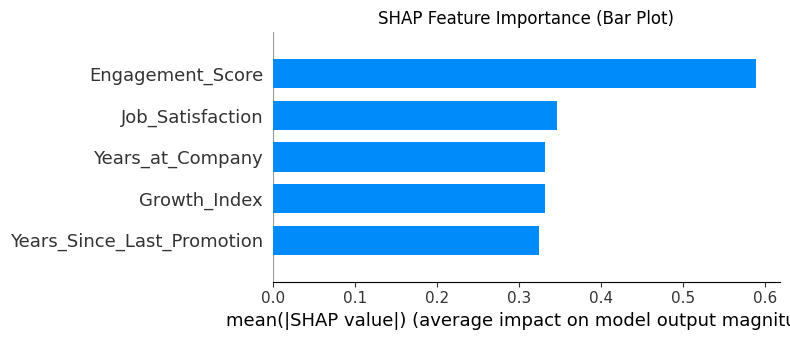

In [ ]:
#Extract the XGBoost model from Voting Classifier
xgb_model = voting_clf.named_estimators_['xgb']

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print("SHAP values shape:", shap_values.shape)

# GLOBAL FEATURE IMPORTANCE (BAR PLOT)
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True, max_display=5)

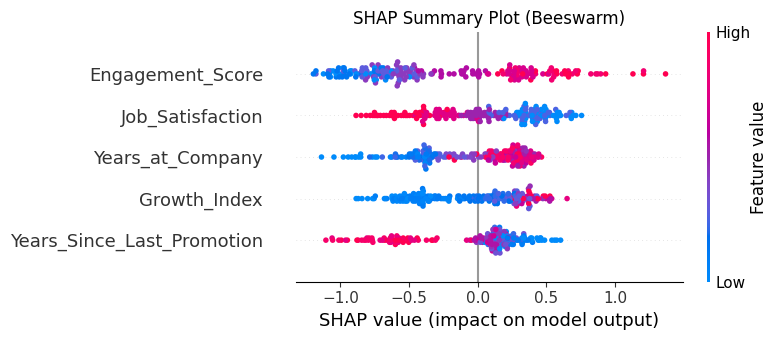

In [ ]:
# DETAILED GLOBAL IMPACT (BEESWARM PLOT)
plt.title("SHAP Summary Plot (Beeswarm)")
shap.summary_plot(shap_values, X_test, show=True, max_display=5)


Force plot for test sample index: 5


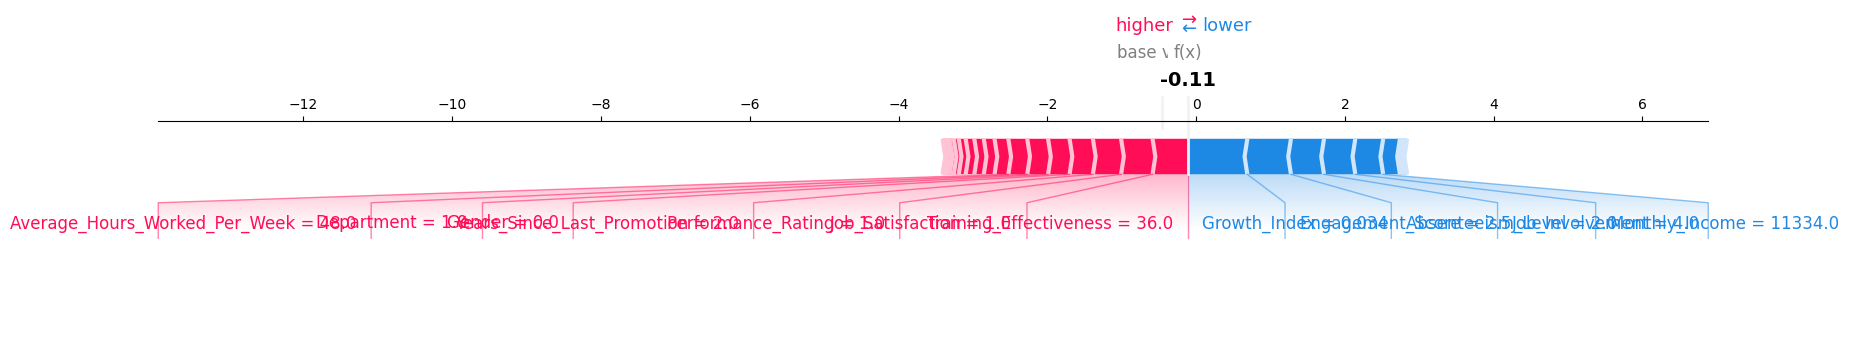

In [ ]:
# FORCE PLOT FOR A SAMPLE EMPLOYEE
idx = 5   # Try different values: 0–len(X_test)

print(f"\nForce plot for test sample index: {idx}")

shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[idx, :],
    X_test.iloc[idx, :],
    matplotlib=True
)

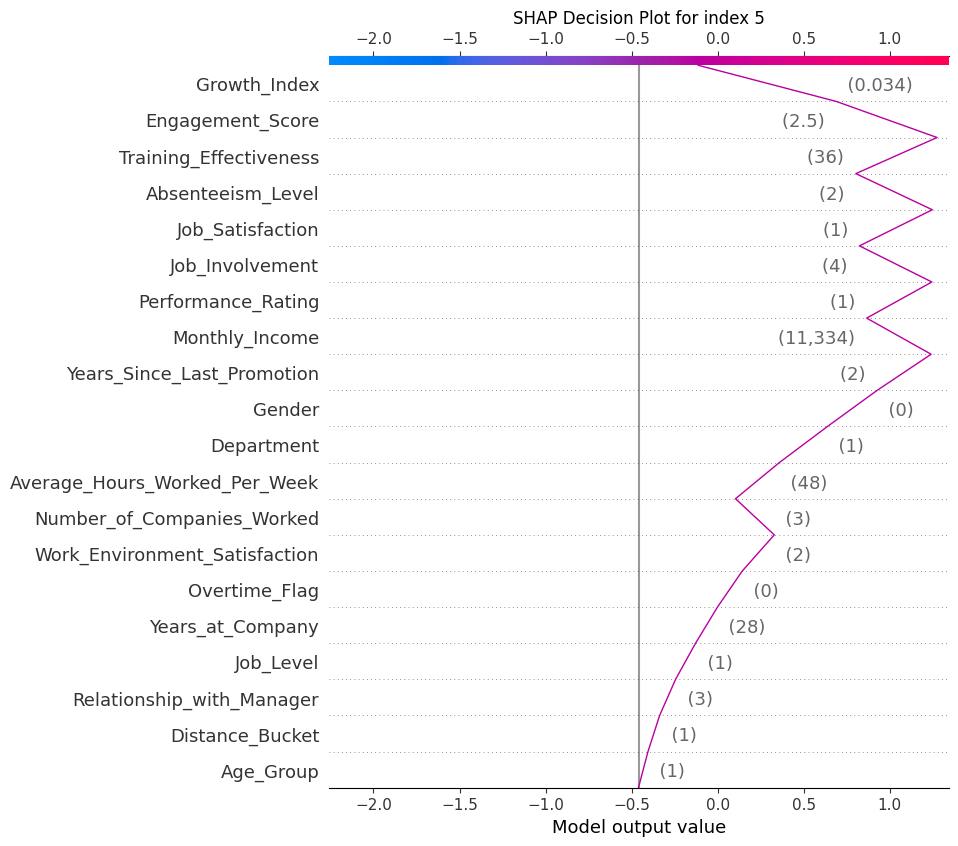

In [ ]:
# DECISION PLOT (HOW MODEL REACHES FINAL PROBABILITY)
plt.title(f"SHAP Decision Plot for index {idx}")
shap.decision_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx]
)


Interaction values computed.


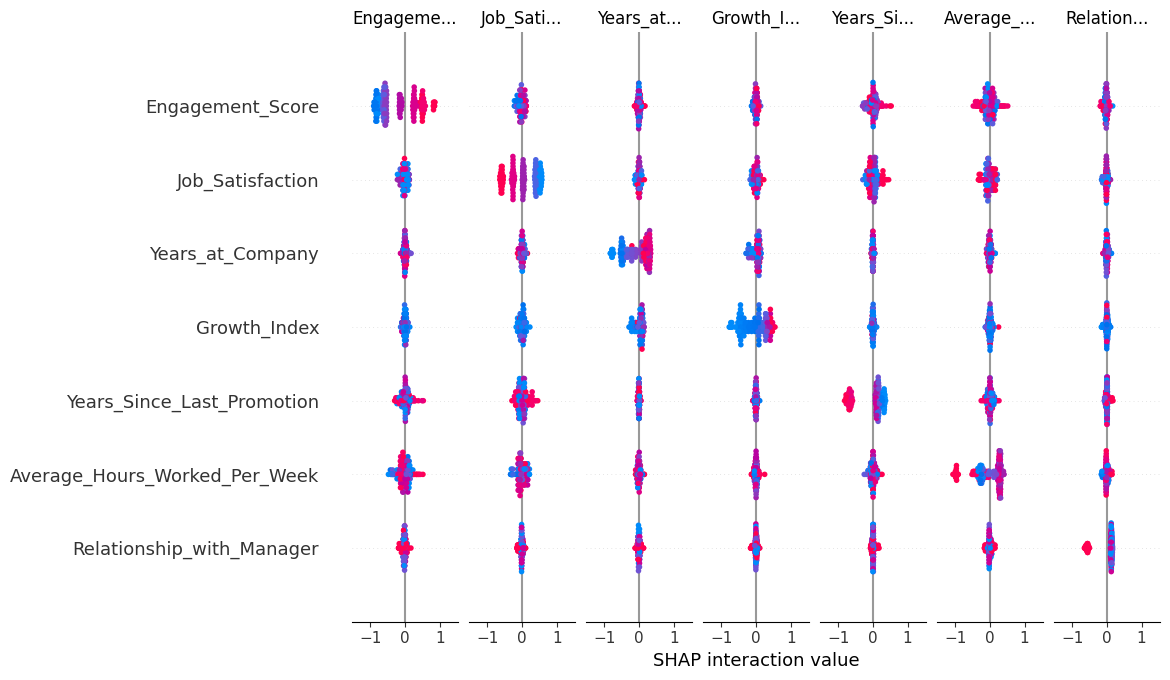

In [ ]:
# OPTIONAL: FEATURE INTERACTION VALUES
try:
    shap_interaction = explainer.shap_interaction_values(X_test)
    print("\nInteraction values computed.")
    shap.summary_plot(shap_interaction, X_test)
except:
    print("\nInteraction values not supported for this model.")

# **6) Clustering**

In [ ]:
df.columns

Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level',
       'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Job_Satisfaction', 'Performance_Rating',
       'Average_Hours_Worked_Per_Week', 'Work_Environment_Satisfaction',
       'Relationship_with_Manager', 'Job_Involvement',
       'Number_of_Companies_Worked', 'Attrition', 'Workload_Index',
       'Engagement_Score', 'Growth_Index', 'Training_Effectiveness',
       'Overtime_Flag', 'Distance_Bucket', 'Absenteeism_Level', 'Age_Group',
       'Work_Efficiency', 'Tenure_Bucket', 'Income_Level'],
      dtype='object')


Cluster Centers:
    Workload_Index  Work_Efficiency  Engagement_Score  Growth_Index  \
0        0.204671         0.184196          0.514562      0.114401   
1        0.218983         0.208515          0.506889      0.118379   
2        0.197151         0.202202          0.515947      0.117067   

   Performance_Rating  
0        4.958848e-01  
1        1.000000e+00  
2       -3.330669e-16  


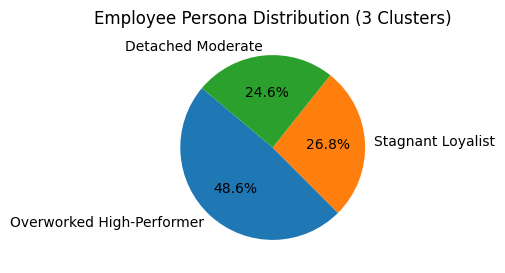

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ------------------------------------------
# 1️⃣ Select valid features from your columns
# ------------------------------------------
cluster_features = df[[
    'Workload_Index',
    'Work_Efficiency',
    'Engagement_Score',
    'Growth_Index',
    'Performance_Rating'
]].copy()

# Handle missing values (if any)
cluster_features = cluster_features.fillna(cluster_features.median())

# ------------------------------------------
# 2️⃣ Scale for clustering
# ------------------------------------------
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

# ------------------------------------------
# 3️⃣ K-Means with 3 clusters
# ------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

# ------------------------------------------------
# 4️⃣ Assign human-friendly persona labels
# ------------------------------------------------
# First, check cluster centers to label correctly
centers = pd.DataFrame(kmeans.cluster_centers_,
                       columns=cluster_features.columns)
print("\nCluster Centers:\n", centers)

# You can update mapping after checking centers
cluster_map = {
    0: "Overworked High-Performer",
    1: "Stagnant Loyalist",
    2: "Detached Moderate"
}

df['Cluster_Label'] = df['Cluster'].map(cluster_map)

# ------------------------------------------
# 5️⃣ Pie Chart Visualization
# ------------------------------------------
cluster_counts = df['Cluster_Label'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Employee Persona Distribution (3 Clusters)")
plt.show()
